# SPARQL about van Gogh -- on CoCalc!

We are going to use some the [DBPedia SPARQL endpoint](http://wiki.dbpedia.org/OnlineAccess#1.1%20Public%20SPARQL%20Endpoint) to do some queries related to _Vincent van Gogh_.

First we define the endpoint and the preferred language for labels

In [1]:
%endpoint http://dbpedia.org/sparql
%lang en

# This is optional, it would increase the log level.
# The default logfile (unless changed upon kernel installation) is [TMPDIR]/sparqlkernel.log, 
# where [TMPDIR] is the platform default temporal directory
%log debug

Endpoint set to: http://dbpedia.org/sparql Label preferred languages: ['en'] Logging set to DEBUG

Now let's find out the entity URI for _van Gogh_ in DBPedia. We search entities that are persons and whose label contains `van Gogh` (case insensitive).

Note that the DBPedia endpoint has a set of [predefined namespace prefixes](http://dbpedia.org/sparql?nsdecl) that we can use without the need to define them in the query, such as `rdfs:` or `foaf:` so we could remove them from the query without problem.

In [2]:
%format json
%display table 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT ?person ?name
WHERE {
    ?person a foaf:Person .
    ?person rdfs:label ?name
    FILTER regex(?name,"van gogh","i")
    FILTER langMatches(lang(?name),"en")
} LIMIT 20

Return format: JSON Display: table

person 
 name http://dbpedia.org/resource/Vincent_van_Gogh 
 Vincent van Gogh http://dbpedia.org/resource/Johanna_van_Gogh-Bonger 
 Johanna van Gogh-Bonger http://dbpedia.org/resource/Theo_van_Gogh_(art_dealer) 
 Theo van Gogh (art dealer) http://dbpedia.org/resource/Natalie_van_Gogh 
 Natalie van Gogh http://dbpedia.org/resource/Niels_van_Gogh 
 Niels van Gogh http://dbpedia.org/resource/Wil_van_Gogh 
 Wil van Gogh http://dbpedia.org/resource/Theo_van_Gogh_(film_director) 
 Theo van Gogh (film director) http://dbpedia.org/resource/Lothar_van_Gogh 
 Lothar van Gogh Total: 8, Shown: 8

It is clear from the result that we  want the <http://dbpedia.org/resource/Vincent_van_Gogh> DBPedia entity (we can click on the link for confirmation, and it will lead us to a DBPedia web page describing the resource).

## Fact finding

Now that we found his URI, let's search for places, dates and people related with van Gogh.

In this query we also set the table to show the data type for each result

In [4]:
%format json
%display table withtypes

# We might have more than one triple pointing to the same object, so we group by object
# and take one arbitrary predicate

SELECT (SAMPLE(?pred) AS ?prop) ?value
WHERE {

    # Places and dates
    {
        dbr:Vincent_van_Gogh ?pred ?value  .
        { ?pred rdfs:range xsd:date }
        UNION
        { ?pred rdfs:range dbo:Place }
    }
    # People van Gogh relates to
    UNION 
    { 
        dbr:Vincent_van_Gogh ?pred ?value  .
        ?value a foaf:Person 
    }
    # People related to van Gogh
    UNION 
    { 
        ?value ?pred dbr:Vincent_van_Gogh   .
        ?value a foaf:Person 
    }

} GROUP BY ?value ORDER BY ?prop


Return format: JSON Display: table Show Types: on

prop type 
 value type http://dbpedia.org/ontology/birthDate uri 
 1853-03-30 typed-literal http://dbpedia.org/ontology/birthDate uri 
 1853-3-30 typed-literal http://dbpedia.org/ontology/birthPlace uri 
 http://dbpedia.org/resource/Zundert uri http://dbpedia.org/ontology/deathDate uri 
 1890-07-29 typed-literal http://dbpedia.org/ontology/deathDate uri 
 1890-7-29 typed-literal http://dbpedia.org/ontology/deathPlace uri 
 http://dbpedia.org/resource/Auvers-sur-Oise uri http://dbpedia.org/ontology/deathPlace uri 
 http://dbpedia.org/resource/Auberge_Ravoux uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Rob_Liefeld uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Harold_Hecht uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Stephen_Emmer uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Luke_Fildes uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Peter_Lindbergh uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Einojuhani_Rautavaara uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Claude_Monet uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Lazarus_of_Bethany uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Chen_Ke_(artist) uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/William_Hood_Dunwoody uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Casimir_Lefaucheux uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Abraham_Diepraam uri http://dbpedia.org/ontology/wikiPageWikiLink uri 
 http://dbpedia.org/resource/Trento_Longaretti uri Total: 295, Shown: 20



## Find a painting
Now we search for a van Gogh painting whose title contains _"night"_

In [4]:
%format json
%display table 


PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT DISTINCT (?picture) ?name
WHERE {
        ?picture ?p1 dbr:Vincent_van_Gogh .
        ?picture rdfs:label ?name .
        FILTER regex(?name,"night", "i")
        FILTER langMatches(lang(?name),"en")    
}

Return format: JSON Display: table

picture 
 name http://dbpedia.org/resource/Café_Terrace_at_Night 
 Café Terrace at Night http://dbpedia.org/resource/Dodge_MacKnight 
 Dodge MacKnight http://dbpedia.org/resource/Midnight_in_Paris 
 Midnight in Paris http://dbpedia.org/resource/Night_in_paintings_(Western_art) 
 Night in paintings (Western art) http://dbpedia.org/resource/White_House_at_Night 
 White House at Night http://dbpedia.org/resource/The_Night_Café 
 The Night Café http://dbpedia.org/resource/Starry_Night_Over_the_Rhone 
 Starry Night Over the Rhone http://dbpedia.org/resource/The_Starry_Night 
 The Starry Night Total: 8, Shown: 8

Just to show another possibility, we repeat the same query but indicating `raw` display format

In [5]:
%display raw 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT DISTINCT (?picture) ?name
WHERE {
        ?picture ?p1 dbr:Vincent_van_Gogh .
        ?picture rdfs:label ?name .
        FILTER regex(?name,"night", "i")
        FILTER langMatches(lang(?name),"en")    
}

Display: raw

{
  "head": {
    "link": [],
    "vars": [
      "picture",
      "name"
    ]
  },
  "results": {
    "bindings": [
      {
        "name": {
          "type": "literal",
          "value": "Café Terrace at Night",
          "xml:lang": "en"
        },
        "picture": {
          "type": "uri",
          "value": "http://dbpedia.org/resource/Café_Terrace_at_Night"
        }
      },
      {
        "name": {
          "type": "literal",
          "value": "Dodge MacKnight",
          "xml:lang": "en"
        },
        "picture": {
          "type": "uri",
          "value": "http://dbpedia.org/resource/Dodge_MacKnight"
        }
      },
      {
        "name": {
          "type": "literal",
          "value": "Midnight in Paris",
          "xml:lang": "en"
        },
        "picture": {
          "type": "uri",
          "value": "http://dbpedia.org/resource/Midnight_in_Paris"
        }
      },
      {
        "name": {
          "type": "literal",
          "value": "Night in

## Describe a painting

Now we find out all that DBPedia knows about one of those paintings, _Starry Night Over the Rhone_

In [6]:
%format n3
%display table
%lang en
%show all

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
CONSTRUCT  { ?s1 ?p1 dbr:Starry_Night_Over_the_Rhone .
             dbr:Starry_Night_Over_the_Rhone ?p2 ?o1 .
           }
WHERE {
    { ?s1 ?p1 dbr:Starry_Night_Over_the_Rhone }
    UNION
    { dbr:Starry_Night_Over_the_Rhone ?p2 ?o1 }
    
    FILTER ( ?p1 != owl:sameAs && ?p2 != owl:sameAs)
}


Return format: N3 Display: table Label preferred languages: ['en'] Result maximum size: unlimited

Similar data could be obtained by asking the endpoint to `DESCRIBE` the resource. Let's do this, but for a twist let's ask the kernel to draw a graph with the results (for this to work, [Graphviz](http://www.graphviz.org/) should be installed in the system).

We generate a PNG here. Note that `svg` is a much better format than `png`, if the browser supports it (better quality, and hyperlinked nodes).

Return format: N3 Display: svg Label preferred languages: ['en']

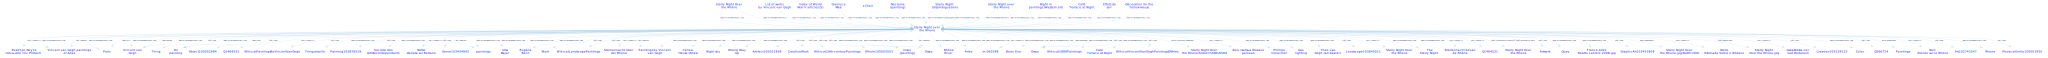

In [11]:
%format n3
%display diagram svg
%lang en

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
DESCRIBE dbr:Starry_Night_Over_the_Rhone

## Locate paintings

Finally, to print out a slightly more complex graph, we will construct one with all of van Gogh's paintings, together with their location and the country they are in.

This one we render as SVG; this has the said advantage of better quality (being a vector format). Plus nodes and edges can contain hyperlinks, so when they are URIs they point to the full URL (note that, unless the `withliterals` option is used, **all** represented nodes will be URIs)

In [12]:
%format n3
%display diagram svg

PREFIX wd: <http://www.wikidata.org/entity/>
CONSTRUCT  { ?painting dbp:museum ?museum .
             ?painting dct:subject ?subject .
             ?museum dbo:location ?location .
             ?location dbo:country ?country .
           }
WHERE {
    ?painting dbp:artist dbr:Vincent_van_Gogh .
    ?painting a wd:Q386724 .
    ?painting a dbo:Artwork .
    ?painting dbp:museum ?museum .
    ?museum dbo:location ?location .
    ?location dbo:country ?country .
}

Return format: N3 Display: svg

<div style="border-top: 1px gray solid; font-family: Cursive, sans-serif;">Version: 1.1 (2016-08-10)<br/>
Author: Paulo Villegas</div>